In [4]:
import pandas as pd
import logging

# Log fayl manzili
log_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Log\ovo_ovr.log"

# Log sozlamalari
logging.basicConfig(
    filename=log_path,
    filemode='a',  # Append mode
    format='%(asctime)s - %(levelname)s - %(message)s',
    level=logging.INFO
)

try:
    logging.info("CSV fayl o'qilmoqda:...")
    df = pd.read_csv(r"C:\Users\Rasulbek907\Desktop\Project_MP\Data\Preprosessed\Preprosessedd.csv")
    logging.info(f"Fayl muvaffaqiyatli o'qildi. Satırlar soni: {len(df)} ustunlar soni: {len(df.columns)}")
except Exception as e:
    logging.error(f"CSV faylni o'qishda xatolik: {e}")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8493 entries, 0 to 8492
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          8493 non-null   int64  
 1   Video ID            8493 non-null   int64  
 2   Video Title         8493 non-null   int64  
 3   Channel             8493 non-null   int64  
 4   Published Date      8493 non-null   float64
 5   Views               8493 non-null   int64  
 6   Likes               8493 non-null   int64  
 7   Comments            8493 non-null   int64  
 8   Subscribers         8493 non-null   int64  
 9   Channel Views       8493 non-null   int64  
 10  Country             8493 non-null   int64  
 11  Region              8493 non-null   int64  
 12  CategoryID          8493 non-null   int64  
 13  CategoryName        8493 non-null   int64  
 14  Cluster             8493 non-null   int64  
 15  CategoryID_enc      8493 non-null   int64  
 16  Countr

In [9]:
x=df.drop('CategoryName',axis=1)
y=df['CategoryName']

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

✅ Accuracy: 1.0000

📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00        68
           2       1.00      1.00      1.00       260
           3       1.00      1.00      1.00       109
           4       1.00      1.00      1.00       120
           5       1.00      1.00      1.00       194
           6       1.00      1.00      1.00       143
           7       1.00      1.00      1.00       143
           8       1.00      1.00      1.00       192
           9       1.00      1.00      1.00       140
          10       1.00      1.00      1.00       101

    accuracy                           1.00      1699
   macro avg       1.00      1.00      1.00      1699
weighted avg       1.00      1.00      1.00      1699



c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


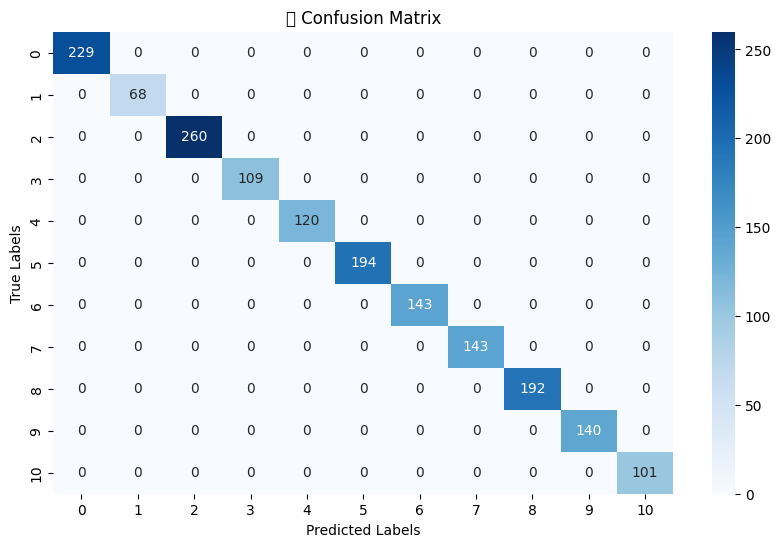

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 1. Ma'lumotlarni ajratish
X = df.select_dtypes(include=['int64', 'float64'])
y_raw = df["CategoryName"]

# 🔹 2. Label encoding (agar target matnli bo‘lsa)
le = LabelEncoder()
y = le.fit_transform(y_raw)

# 🔹 3. Train-test bo‘lish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 4. One-vs-Rest model
ovr_model = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
ovr_model.fit(X_train, y_train)

# 🔹 5. Bashorat
y_pred = ovr_model.predict(X_test)

# 🔹 6. Baholash
acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {acc:.4f}")

# 🔹 7. Klassifikatsiya hisobot
# Agar `le.classes_` raqam bo‘lsa — ularni string ga aylantiramiz:
target_names = [str(c) for c in le.classes_]

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# 🔹 8. Confusion matrix (vizual)
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("📉 Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# OvR

In [14]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# ✅ To‘g‘ri variant
ovr_model = OneVsRestClassifier(RandomForestClassifier(
    n_estimators=100,      # Daraxtlar soni
    random_state=42
))

# Modelni o‘qitish
ovr_model.fit(X_train, y_train)

# Bashorat
y_pred_ovr = ovr_model.predict(X_test)

# Baholash
print("=== One-vs-Rest (OvR) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_ovr))


=== One-vs-Rest (OvR) ===
Accuracy: 1.0


In [17]:
y_pred_ovr[0]

np.int64(8)

# OvO

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score


ovo_model = OneVsOneClassifier(RandomForestClassifier(
    n_estimators=100,      # Daraxtlar soni
    random_state=42
))

ovo_model.fit(X_train, y_train)
y_pred_ovo = ovo_model.predict(X_test)
print("=== One-vs-One (OvO) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_ovo))


=== One-vs-One (OvO) ===
Accuracy: 1.0


In [21]:
y_pred_ovo[0]

np.int64(8)